# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [26]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

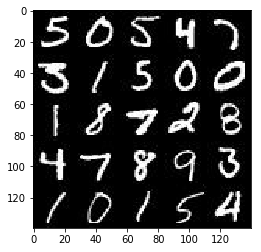

In [27]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

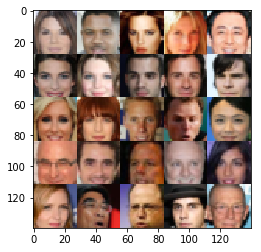

In [28]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [29]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [30]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    tensor_of_real_input_images = tf.placeholder(tf.float32, \
                                                 shape = (None, \
                                                          image_height, \
                                                          image_width, \
                                                          image_channels), \
                                                name = 'real_input')
    
    tensor_of_z_data = tf.placeholder(tf.float32, shape = (None, z_dim), name = 'z_input')
    
    learning_rate = tf.placeholder(tf.float32, shape = None, name = 'learning_rate') 
    

    return (tensor_of_real_input_images, tensor_of_z_data, learning_rate)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [31]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    alpha = 0.2
    
    with tf.variable_scope('discriminator', reuse=reuse):
            
        #### The Input layer will be of size 28x28x?, layer 1 ####
        #I like using the xavier initializer, but here's for normal_dist just in case
        #I can see what I get better/faster results with
        #kernel_initializer=tf.random_normal_initializer(stddev=.01 or .02?)
        
        layer1 = tf.layers.conv2d(images, 64, 5, strides = 2, padding = 'same', \
                                  kernel_initializer=tf.contrib.layers.xavier_initializer())
    
        layer1 = tf.maximum(alpha * layer1, layer1)
        #### The output dimensions of layer1 should be : 28x28x64 ####
        
        
        
        #### Layer 2 input dimensions are 28x28x64 ####
        layer2 = tf.layers.conv2d(layer1, 128, 5, strides = 2, padding = 'same', \
                                  kernel_initializer=tf.contrib.layers.xavier_initializer())
        
        layer2 = tf.layers.batch_normalization(layer2, training = True)
        layer2 = tf.maximum(alpha * layer2, layer2)
        #### The output dimensions of layer2 should be : 14x14x128 ####
        
        
        
        #### Layer 3 input dimensions are 14x14x128 ####
        layer3 = tf.layers.conv2d(layer2, 256, 5, strides = 2, padding = 'same', \
                                  kernel_initializer=tf.contrib.layers.xavier_initializer())
        
        layer3 = tf.layers.batch_normalization(layer3, training = True)
        layer3 = tf.maximum(alpha * layer3, layer3)
        #### The output dimensions of layer2 should be : 7x7x256 ####
        
        
        
        #### Layer 4 input dimensions are 7x7x256 ####
        layer4 = tf.layers.conv2d(layer3, 512, 5, strides = 2, padding = 'same', \
                                  kernel_initializer=tf.contrib.layers.xavier_initializer())
        
        layer4 = tf.layers.batch_normalization(layer4, training = True)
        layer4 = tf.maximum(alpha * layer4, layer4)
        #### The output dimensions of layer2 should be : 4x4x512 ####
        
        
        
        # Here we flatten everything using tf.reshape
        #Forgot syntax
        # tensor 't' is [1, 2, 3, 4, 5, 6, 7, 8, 9]
        # tensor 't' has shape [9]
        # tf.reshape(t, [3, 3]) ==> [[1, 2, 3],
        #                         [4, 5, 6],
        #                         [7, 8, 9]]

        flatten_layer = tf.reshape(layer4, (-1, 4*4*512))
        
        tensor_logits = tf.layers.dense(flatten_layer, 1, \
                                 kernel_initializer=tf.contrib.layers.xavier_initializer())
        
        tensor_output = tf.sigmoid(tensor_logits)
        
    
    
    return (tensor_output, tensor_logits)
    
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [32]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    #Use tf.variable_scope with a scope name of "generator" to allow the variables 
    #to be reused. The function should return the generated 28 x 28 x out_channel_dim
    #images.
    
    alpha = 0.2
    dropout = 0.5
    
    with tf.variable_scope('generator', reuse = not is_train):
        
        
        # The first layer is a fully connected layer
        #### Input dim: 7x7x256 ####
        layer1 = tf.layers.dense(z, 7 * 7 * 256, \
                                 kernel_initializer = tf.contrib.layers.xavier_initializer())
        
        layer1 = tf.reshape(layer1, (-1, 7, 7, 256))
        layer1 = tf.layers.batch_normalization(layer1, training = is_train)
        layer1 = tf.maximum(alpha * layer1, layer1)
        #### Output dim: 7x7x256 ####
        
        
        #Layer 2
        #### Input dim: 7x7x256 ####
        layer2 = tf.layers.conv2d_transpose(layer1, 256, 5, strides = 2, padding = "same", \
                                 kernel_initializer = tf.contrib.layers.xavier_initializer())
        
        layer2 = tf.layers.batch_normalization(layer2, training = is_train)
        layer2 = tf.maximum(alpha * layer2, layer2)
        #### Output dim: 14x14x256 ####
        
        
        
        #Layer 3
        #### Input dim: 14x14x256 ####
        layer3 = tf.layers.conv2d_transpose(layer2, 128, 5, strides = 2, padding = "same", \
                                 kernel_initializer = tf.contrib.layers.xavier_initializer())
        
        layer3 = tf.layers.batch_normalization(layer3, training = is_train)
        layer3 = tf.layers.dropout(layer3, dropout, training = is_train)
        layer3 = tf.maximum(alpha * layer3, layer3)
        #### Output dim: 28x28x128 ####    
    

    
        #Layer 4
        #### Input dim: 28x28x128 ####
        layer4 = tf.layers.conv2d_transpose(layer3, 64, 5, padding = "same", \
                                 kernel_initializer = tf.contrib.layers.xavier_initializer())
        
        layer4 = tf.layers.batch_normalization(layer4, training = is_train)
        layer4 = tf.layers.dropout(layer4, dropout, training = is_train)
        layer4 = tf.maximum(alpha * layer4, layer4)
        #### Output dim: 28x28x64 ####         
        
    
        
        
        #Layer 5
        #### Input dim: 28x28x64 ####
        layer5 = tf.layers.conv2d_transpose(layer4, out_channel_dim, 5, padding = "same", \
                                 kernel_initializer = tf.contrib.layers.xavier_initializer())
        #### Output dim: 28x28xout_channel_dim ####         
        

        #Output layer
        output_layer = tf.tanh(layer5)
    
    return output_layer



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [33]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    smooth = .05
    
    
    generator_model = generator(input_z, out_channel_dim)
     

    discrim_output_real, discrim_logits_real = discriminator(input_real)
    discrim_output_fake, discrim_logits_fake = discriminator(generator_model, reuse = True)

    
    #     sigmoid_cross_entropy_with_logits(
    #     _sentinel=None,
    #     labels=None,
    #     logits=None,
    #     name=None
    # )
    #Computes sigmoid cross entropy given logits.
    #Measures the probability error in discrete classification tasks in which each class 
    #is independent and not mutually exclusive. For instance, one could perform multilabel
    #classification where a picture can contain both an elephant and a dog at the same 
    #time.

    #     ones_like(
    #     tensor,
    #     dtype=None,
    #     name=None,
    #     optimize=True
    # )
    # Creates a tensor with all 1s
    # zeros_like= " " 0s
    
    discrim_loss_real = tf.reduce_mean(\
                tf.nn.sigmoid_cross_entropy_with_logits(\
                        logits = discrim_logits_real, \
                        labels = \
                        tf.ones_like(discrim_output_real) * (1-smooth))) 
    
    discrim_loss_fake = tf.reduce_mean(
                tf.nn.sigmoid_cross_entropy_with_logits(\
                        logits = discrim_logits_fake, \
                        labels = tf.zeros_like(discrim_output_fake)))
    
    generator_loss = tf.reduce_mean(\
                tf.nn.sigmoid_cross_entropy_with_logits(\
                        logits = discrim_logits_fake, \
                        labels = tf.ones_like(discrim_output_fake)))

    
    discriminator_loss = discrim_loss_real + discrim_loss_fake
    
    
    return (discriminator_loss, generator_loss)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [34]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function 
    

    #Use tf.trainable_variables to get all the trainable variables.
    #Returns all variables created with trainable=True.
    training_variables = tf.trainable_variables()
    
    #Filter the variables with names that are in the discriminator and generator 
    #scope names.
    #List comprehension is cool B)
    
    discriminator_variables = [variable for variable in training_variables \
                               if variable.name.startswith('discriminator')]
    
    
    generator_variables = [variable for variable in training_variables \
                           if variable.name.startswith('generator')]

    
    
    #Implement model_opt to create the optimization operations for the GANs.
    
    #tf.control_dependencies:
    # control_inputs: A list of Operation or Tensor objects which must be executed 
    #or computed before running the operations defined in the context. Can also be
    #None to clear the control dependencies.
    # Returns:
    # A context manager that specifies control dependencies for all operations 
    #constructed within the context
    
    #     get_collection(
    #     key,
    #     scope=None
    # )
    #     Returns:
    # The list of values in the collection with the given name, or an empty list 
    #if no value has been added to that collection. The list contains the values 
    #in the order under which they were collected.

    #tf.train.AdamOptimizer
    #     __init__(
    #     learning_rate=0.001,
    #     beta1=0.9,
    #     beta2=0.999,
    #     epsilon=1e-08,
    #     use_locking=False,
    #     name='Adam'
    # )

    #https://www.tensorflow.org/api_docs/python/tf/GraphKeys
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        
        discriminator_training_operation = tf.train.AdamOptimizer(\
                                            learning_rate, beta1 = beta1).\
                                            minimize(d_loss, var_list = \
                                                     discriminator_variables)
            
            
        generator_training_operation = tf.train.AdamOptimizer(\
                                        learning_rate, beta1=beta1).\
                                        minimize(g_loss, var_list = \
                                                 generator_variables)

        
    return (discriminator_training_operation, generator_training_operation)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [35]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [36]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    #This is for information on the images
    image_width, image_height, image_channels = data_shape[1:]
    
    #Model loss and Optimizers
    input_real, input_z, learning_rate_hold = \
                        model_inputs(image_width, image_height, image_channels, z_dim)
    
    
    discrim_loss, gen_loss = model_loss(input_real, input_z, image_channels)
    discrim_opt, gen_opt = model_opt(discrim_loss, gen_loss, learning_rate, beta1)
    
    
    step = 0
    print_frequency = 10
    show_frequency = 100
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                
                step += 1
                batch_images *= 2
                
                #Uniform distribution for random input
                batch_z = np.random.uniform(-1, 1, size = (batch_size, z_dim))
                
                #Optimizers
                opt = sess.run(discrim_opt, \
                               feed_dict=\
                                {input_real: batch_images, input_z: batch_z, \
                                 learning_rate_hold: learning_rate})
                
                opt = sess.run(gen_opt, \
                               feed_dict=\
                               {input_z: batch_z, input_real: batch_images, \
                                learning_rate_hold: learning_rate})
                
                if step % print_frequency == 0:#Modulo div
                    discrim_training_loss = discrim_loss.eval({input_z: batch_z, \
                                                              input_real: batch_images})
                    gener_training_loss = gen_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                         "Discriminator Loss: {:.4f}...".format(discrim_training_loss),
                         "Generator Loss: {:.4f}".format(gener_training_loss))
                

                if step % show_frequency == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)

            
            
            #saver.save(sess, save_dir, global_step = epoch_i)

                      
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.4251... Generator Loss: 5.8354
Epoch 1/2... Discriminator Loss: 1.6398... Generator Loss: 0.5553
Epoch 1/2... Discriminator Loss: 0.9684... Generator Loss: 1.2495
Epoch 1/2... Discriminator Loss: 1.4774... Generator Loss: 0.7677
Epoch 1/2... Discriminator Loss: 1.5793... Generator Loss: 0.3998
Epoch 1/2... Discriminator Loss: 1.7397... Generator Loss: 1.0732
Epoch 1/2... Discriminator Loss: 2.5395... Generator Loss: 2.9251
Epoch 1/2... Discriminator Loss: 1.5849... Generator Loss: 0.3657
Epoch 1/2... Discriminator Loss: 3.4099... Generator Loss: 0.0627
Epoch 1/2... Discriminator Loss: 1.5341... Generator Loss: 0.4147


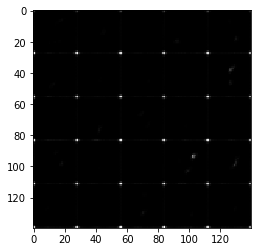

Epoch 1/2... Discriminator Loss: 1.6401... Generator Loss: 0.4010
Epoch 1/2... Discriminator Loss: 1.1586... Generator Loss: 0.9507
Epoch 1/2... Discriminator Loss: 1.2592... Generator Loss: 1.0948
Epoch 1/2... Discriminator Loss: 1.3055... Generator Loss: 2.1776
Epoch 1/2... Discriminator Loss: 1.9667... Generator Loss: 2.5040
Epoch 1/2... Discriminator Loss: 2.9109... Generator Loss: 3.7880
Epoch 1/2... Discriminator Loss: 0.9106... Generator Loss: 1.1814
Epoch 1/2... Discriminator Loss: 3.7480... Generator Loss: 0.0443
Epoch 1/2... Discriminator Loss: 1.3517... Generator Loss: 0.7412
Epoch 1/2... Discriminator Loss: 1.5942... Generator Loss: 2.7076


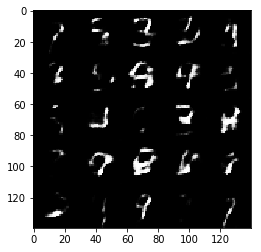

Epoch 1/2... Discriminator Loss: 2.5462... Generator Loss: 0.1256
Epoch 1/2... Discriminator Loss: 1.2633... Generator Loss: 3.2989
Epoch 1/2... Discriminator Loss: 1.3946... Generator Loss: 0.8574
Epoch 1/2... Discriminator Loss: 1.2485... Generator Loss: 0.4872
Epoch 1/2... Discriminator Loss: 1.4463... Generator Loss: 0.4387
Epoch 1/2... Discriminator Loss: 2.0476... Generator Loss: 0.2543
Epoch 1/2... Discriminator Loss: 2.8638... Generator Loss: 0.1280
Epoch 1/2... Discriminator Loss: 1.3618... Generator Loss: 0.4754
Epoch 1/2... Discriminator Loss: 1.2329... Generator Loss: 1.3105
Epoch 1/2... Discriminator Loss: 1.0492... Generator Loss: 1.1542


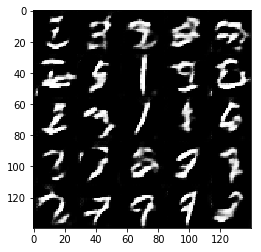

Epoch 1/2... Discriminator Loss: 1.0699... Generator Loss: 1.1228
Epoch 1/2... Discriminator Loss: 1.6554... Generator Loss: 0.2803
Epoch 1/2... Discriminator Loss: 1.2323... Generator Loss: 0.4769
Epoch 1/2... Discriminator Loss: 2.4550... Generator Loss: 0.1310
Epoch 1/2... Discriminator Loss: 1.1644... Generator Loss: 1.1990
Epoch 1/2... Discriminator Loss: 1.1578... Generator Loss: 1.1997
Epoch 1/2... Discriminator Loss: 1.5735... Generator Loss: 0.2941
Epoch 1/2... Discriminator Loss: 1.6778... Generator Loss: 0.3968
Epoch 1/2... Discriminator Loss: 0.9955... Generator Loss: 1.2844
Epoch 1/2... Discriminator Loss: 1.2688... Generator Loss: 1.5317


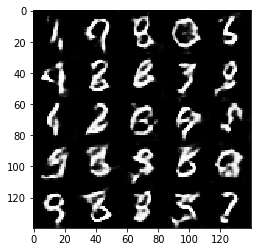

Epoch 1/2... Discriminator Loss: 1.6609... Generator Loss: 0.3334
Epoch 1/2... Discriminator Loss: 2.1559... Generator Loss: 0.1933
Epoch 1/2... Discriminator Loss: 2.3794... Generator Loss: 0.1296
Epoch 1/2... Discriminator Loss: 1.1830... Generator Loss: 0.5593
Epoch 1/2... Discriminator Loss: 2.5473... Generator Loss: 0.1315
Epoch 1/2... Discriminator Loss: 0.9713... Generator Loss: 1.1252
Epoch 1/2... Discriminator Loss: 1.7294... Generator Loss: 0.2931
Epoch 1/2... Discriminator Loss: 1.8491... Generator Loss: 0.2346
Epoch 1/2... Discriminator Loss: 1.6276... Generator Loss: 0.3700
Epoch 1/2... Discriminator Loss: 2.1897... Generator Loss: 0.1829


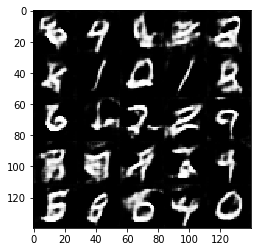

Epoch 1/2... Discriminator Loss: 1.6989... Generator Loss: 0.4330
Epoch 1/2... Discriminator Loss: 1.2398... Generator Loss: 0.5710
Epoch 1/2... Discriminator Loss: 2.2218... Generator Loss: 0.1600
Epoch 1/2... Discriminator Loss: 0.7833... Generator Loss: 1.4082
Epoch 1/2... Discriminator Loss: 2.4249... Generator Loss: 0.1851
Epoch 1/2... Discriminator Loss: 0.8273... Generator Loss: 1.2310
Epoch 1/2... Discriminator Loss: 0.7882... Generator Loss: 1.4379
Epoch 1/2... Discriminator Loss: 1.2429... Generator Loss: 0.5759
Epoch 1/2... Discriminator Loss: 1.3736... Generator Loss: 0.5354
Epoch 1/2... Discriminator Loss: 0.8624... Generator Loss: 1.2876


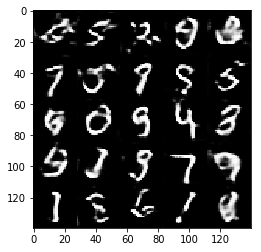

Epoch 1/2... Discriminator Loss: 1.6325... Generator Loss: 0.3294
Epoch 1/2... Discriminator Loss: 1.7075... Generator Loss: 0.4536
Epoch 1/2... Discriminator Loss: 0.9851... Generator Loss: 0.9823
Epoch 1/2... Discriminator Loss: 0.9928... Generator Loss: 0.9443
Epoch 1/2... Discriminator Loss: 0.8281... Generator Loss: 1.1979
Epoch 1/2... Discriminator Loss: 2.5863... Generator Loss: 0.1105
Epoch 1/2... Discriminator Loss: 2.5493... Generator Loss: 0.1099
Epoch 1/2... Discriminator Loss: 1.2447... Generator Loss: 1.0887
Epoch 1/2... Discriminator Loss: 1.3414... Generator Loss: 0.4976
Epoch 1/2... Discriminator Loss: 0.9686... Generator Loss: 1.1773


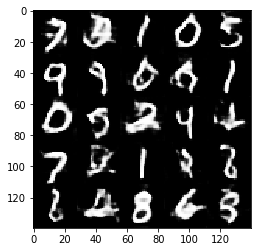

Epoch 1/2... Discriminator Loss: 0.6827... Generator Loss: 1.3288
Epoch 1/2... Discriminator Loss: 1.1928... Generator Loss: 0.5914
Epoch 1/2... Discriminator Loss: 0.9157... Generator Loss: 0.9920
Epoch 1/2... Discriminator Loss: 1.4006... Generator Loss: 0.3833
Epoch 1/2... Discriminator Loss: 0.8466... Generator Loss: 1.3445
Epoch 1/2... Discriminator Loss: 1.2982... Generator Loss: 1.5113
Epoch 1/2... Discriminator Loss: 0.9731... Generator Loss: 0.9259
Epoch 1/2... Discriminator Loss: 0.9998... Generator Loss: 0.7675
Epoch 1/2... Discriminator Loss: 0.6318... Generator Loss: 1.3333
Epoch 1/2... Discriminator Loss: 2.3114... Generator Loss: 0.1882


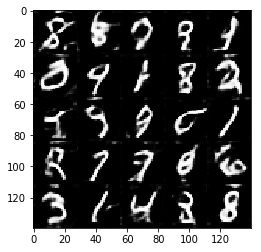

Epoch 1/2... Discriminator Loss: 0.6551... Generator Loss: 2.0880
Epoch 1/2... Discriminator Loss: 1.4434... Generator Loss: 0.3975
Epoch 1/2... Discriminator Loss: 1.1547... Generator Loss: 1.4624
Epoch 1/2... Discriminator Loss: 1.5320... Generator Loss: 0.4089
Epoch 1/2... Discriminator Loss: 0.6436... Generator Loss: 2.6116
Epoch 1/2... Discriminator Loss: 0.7168... Generator Loss: 3.0492
Epoch 1/2... Discriminator Loss: 0.5395... Generator Loss: 1.5518
Epoch 1/2... Discriminator Loss: 0.5889... Generator Loss: 1.7296
Epoch 1/2... Discriminator Loss: 2.8315... Generator Loss: 5.1094
Epoch 1/2... Discriminator Loss: 0.6154... Generator Loss: 1.3298


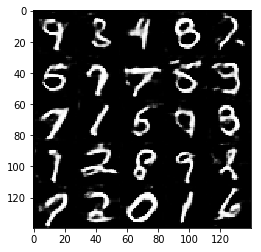

Epoch 1/2... Discriminator Loss: 2.0422... Generator Loss: 0.2413
Epoch 1/2... Discriminator Loss: 2.3777... Generator Loss: 0.1721
Epoch 1/2... Discriminator Loss: 0.9691... Generator Loss: 1.1189
Epoch 2/2... Discriminator Loss: 1.0872... Generator Loss: 3.4012
Epoch 2/2... Discriminator Loss: 1.1187... Generator Loss: 0.8072
Epoch 2/2... Discriminator Loss: 1.2233... Generator Loss: 0.4473
Epoch 2/2... Discriminator Loss: 0.8474... Generator Loss: 0.9788
Epoch 2/2... Discriminator Loss: 1.6815... Generator Loss: 0.4591
Epoch 2/2... Discriminator Loss: 0.9392... Generator Loss: 3.1898
Epoch 2/2... Discriminator Loss: 0.5379... Generator Loss: 1.9588


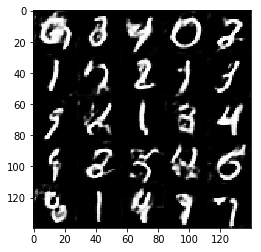

Epoch 2/2... Discriminator Loss: 0.8056... Generator Loss: 1.2076
Epoch 2/2... Discriminator Loss: 0.9497... Generator Loss: 0.8521
Epoch 2/2... Discriminator Loss: 0.8362... Generator Loss: 1.9330
Epoch 2/2... Discriminator Loss: 1.3252... Generator Loss: 0.6592
Epoch 2/2... Discriminator Loss: 1.1310... Generator Loss: 1.2788
Epoch 2/2... Discriminator Loss: 1.2046... Generator Loss: 0.6198
Epoch 2/2... Discriminator Loss: 1.2158... Generator Loss: 0.5550
Epoch 2/2... Discriminator Loss: 0.9314... Generator Loss: 1.2597
Epoch 2/2... Discriminator Loss: 1.9748... Generator Loss: 0.2732
Epoch 2/2... Discriminator Loss: 0.7305... Generator Loss: 1.0547


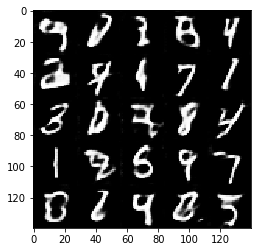

Epoch 2/2... Discriminator Loss: 1.2843... Generator Loss: 0.5086
Epoch 2/2... Discriminator Loss: 0.4516... Generator Loss: 1.9045
Epoch 2/2... Discriminator Loss: 1.3752... Generator Loss: 0.4281
Epoch 2/2... Discriminator Loss: 0.7040... Generator Loss: 1.1126
Epoch 2/2... Discriminator Loss: 1.0527... Generator Loss: 0.6941
Epoch 2/2... Discriminator Loss: 0.3756... Generator Loss: 2.3326
Epoch 2/2... Discriminator Loss: 0.5690... Generator Loss: 1.9008
Epoch 2/2... Discriminator Loss: 1.0985... Generator Loss: 0.8819
Epoch 2/2... Discriminator Loss: 0.4481... Generator Loss: 4.7260
Epoch 2/2... Discriminator Loss: 1.4384... Generator Loss: 5.0264


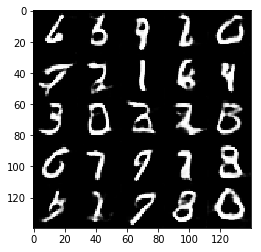

Epoch 2/2... Discriminator Loss: 1.1337... Generator Loss: 0.5954
Epoch 2/2... Discriminator Loss: 1.0286... Generator Loss: 0.5176
Epoch 2/2... Discriminator Loss: 0.6765... Generator Loss: 1.5590
Epoch 2/2... Discriminator Loss: 1.1183... Generator Loss: 0.3980
Epoch 2/2... Discriminator Loss: 0.8623... Generator Loss: 5.0013
Epoch 2/2... Discriminator Loss: 1.9229... Generator Loss: 0.2229
Epoch 2/2... Discriminator Loss: 2.0407... Generator Loss: 0.1824
Epoch 2/2... Discriminator Loss: 1.4896... Generator Loss: 0.4500
Epoch 2/2... Discriminator Loss: 0.9182... Generator Loss: 0.7992
Epoch 2/2... Discriminator Loss: 0.8899... Generator Loss: 1.0979


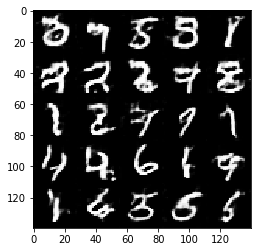

Epoch 2/2... Discriminator Loss: 0.5956... Generator Loss: 1.6341
Epoch 2/2... Discriminator Loss: 1.5579... Generator Loss: 2.8280
Epoch 2/2... Discriminator Loss: 2.1383... Generator Loss: 0.1816
Epoch 2/2... Discriminator Loss: 0.8812... Generator Loss: 1.3391
Epoch 2/2... Discriminator Loss: 1.2902... Generator Loss: 4.2485
Epoch 2/2... Discriminator Loss: 0.7877... Generator Loss: 1.1538
Epoch 2/2... Discriminator Loss: 0.8420... Generator Loss: 1.4814
Epoch 2/2... Discriminator Loss: 0.8854... Generator Loss: 1.0404
Epoch 2/2... Discriminator Loss: 0.6620... Generator Loss: 2.6345
Epoch 2/2... Discriminator Loss: 0.9639... Generator Loss: 0.8107


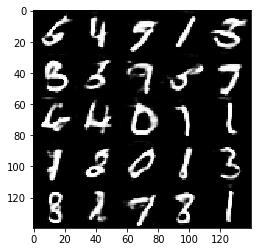

Epoch 2/2... Discriminator Loss: 1.2817... Generator Loss: 0.5972
Epoch 2/2... Discriminator Loss: 1.4860... Generator Loss: 0.5408
Epoch 2/2... Discriminator Loss: 1.0905... Generator Loss: 0.7632
Epoch 2/2... Discriminator Loss: 2.4022... Generator Loss: 0.1679
Epoch 2/2... Discriminator Loss: 0.6884... Generator Loss: 1.3940
Epoch 2/2... Discriminator Loss: 0.5512... Generator Loss: 1.6621
Epoch 2/2... Discriminator Loss: 0.8307... Generator Loss: 1.0935
Epoch 2/2... Discriminator Loss: 1.4939... Generator Loss: 0.4599
Epoch 2/2... Discriminator Loss: 0.7830... Generator Loss: 0.9297
Epoch 2/2... Discriminator Loss: 1.0197... Generator Loss: 0.6510


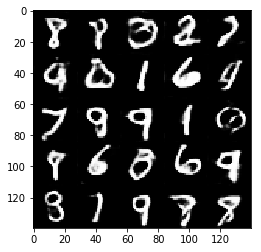

Epoch 2/2... Discriminator Loss: 0.7513... Generator Loss: 1.2466
Epoch 2/2... Discriminator Loss: 0.7899... Generator Loss: 1.0896
Epoch 2/2... Discriminator Loss: 1.2074... Generator Loss: 0.7205
Epoch 2/2... Discriminator Loss: 1.0957... Generator Loss: 0.9679
Epoch 2/2... Discriminator Loss: 1.2191... Generator Loss: 0.6251
Epoch 2/2... Discriminator Loss: 1.1259... Generator Loss: 0.7930
Epoch 2/2... Discriminator Loss: 2.0154... Generator Loss: 3.9647
Epoch 2/2... Discriminator Loss: 1.2189... Generator Loss: 0.8632
Epoch 2/2... Discriminator Loss: 1.1068... Generator Loss: 0.7624
Epoch 2/2... Discriminator Loss: 1.3477... Generator Loss: 0.4493


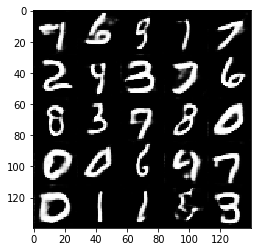

Epoch 2/2... Discriminator Loss: 1.7565... Generator Loss: 0.2551
Epoch 2/2... Discriminator Loss: 1.4599... Generator Loss: 0.4010
Epoch 2/2... Discriminator Loss: 0.5041... Generator Loss: 2.4085
Epoch 2/2... Discriminator Loss: 0.6755... Generator Loss: 1.3900
Epoch 2/2... Discriminator Loss: 1.3032... Generator Loss: 3.3904
Epoch 2/2... Discriminator Loss: 2.4273... Generator Loss: 0.2713
Epoch 2/2... Discriminator Loss: 2.3793... Generator Loss: 0.2075
Epoch 2/2... Discriminator Loss: 0.3936... Generator Loss: 2.0401
Epoch 2/2... Discriminator Loss: 0.8473... Generator Loss: 1.4877
Epoch 2/2... Discriminator Loss: 1.2220... Generator Loss: 0.6215


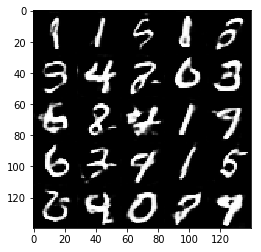

Epoch 2/2... Discriminator Loss: 0.5882... Generator Loss: 1.9131
Epoch 2/2... Discriminator Loss: 2.8079... Generator Loss: 0.1545
Epoch 2/2... Discriminator Loss: 1.0776... Generator Loss: 0.7289
Epoch 2/2... Discriminator Loss: 0.6378... Generator Loss: 1.0532
Epoch 2/2... Discriminator Loss: 0.6479... Generator Loss: 1.1813
Epoch 2/2... Discriminator Loss: 1.5021... Generator Loss: 0.4216
Epoch 2/2... Discriminator Loss: 0.5827... Generator Loss: 1.2111
Epoch 2/2... Discriminator Loss: 1.3402... Generator Loss: 0.4926
Epoch 2/2... Discriminator Loss: 0.6965... Generator Loss: 2.1369
Epoch 2/2... Discriminator Loss: 0.7814... Generator Loss: 2.9586


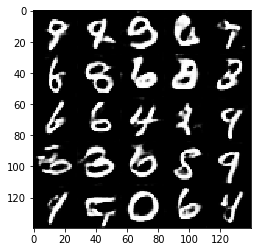

Epoch 2/2... Discriminator Loss: 0.6830... Generator Loss: 1.5778
Epoch 2/2... Discriminator Loss: 1.1825... Generator Loss: 0.9135
Epoch 2/2... Discriminator Loss: 2.2717... Generator Loss: 0.3803
Epoch 2/2... Discriminator Loss: 1.5252... Generator Loss: 0.3632
Epoch 2/2... Discriminator Loss: 1.3330... Generator Loss: 0.5549
Epoch 2/2... Discriminator Loss: 0.6463... Generator Loss: 1.0572
Epoch 2/2... Discriminator Loss: 0.6006... Generator Loss: 1.0323


In [37]:
batch_size = 64
z_dim = 128
learning_rate = .001
beta1 = .5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 4.5264... Generator Loss: 0.0389
Epoch 1/1... Discriminator Loss: 4.2021... Generator Loss: 0.0337
Epoch 1/1... Discriminator Loss: 0.6222... Generator Loss: 2.1004
Epoch 1/1... Discriminator Loss: 0.7091... Generator Loss: 1.2460
Epoch 1/1... Discriminator Loss: 0.9316... Generator Loss: 4.4645
Epoch 1/1... Discriminator Loss: 1.3664... Generator Loss: 0.5664
Epoch 1/1... Discriminator Loss: 0.5891... Generator Loss: 2.3059
Epoch 1/1... Discriminator Loss: 0.5607... Generator Loss: 1.4835
Epoch 1/1... Discriminator Loss: 0.5592... Generator Loss: 3.7587
Epoch 1/1... Discriminator Loss: 0.3008... Generator Loss: 4.5106


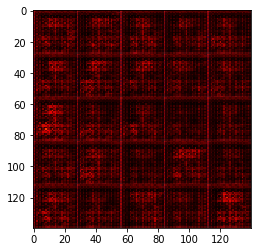

Epoch 1/1... Discriminator Loss: 2.8566... Generator Loss: 7.4085
Epoch 1/1... Discriminator Loss: 1.9002... Generator Loss: 5.8420
Epoch 1/1... Discriminator Loss: 0.4838... Generator Loss: 2.0674
Epoch 1/1... Discriminator Loss: 0.4405... Generator Loss: 2.1149
Epoch 1/1... Discriminator Loss: 1.6272... Generator Loss: 1.6211
Epoch 1/1... Discriminator Loss: 0.7775... Generator Loss: 1.2553
Epoch 1/1... Discriminator Loss: 0.4165... Generator Loss: 2.0917
Epoch 1/1... Discriminator Loss: 0.6638... Generator Loss: 2.7758
Epoch 1/1... Discriminator Loss: 1.3522... Generator Loss: 0.9391
Epoch 1/1... Discriminator Loss: 0.6951... Generator Loss: 1.4224


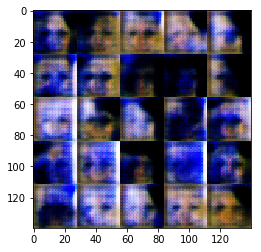

Epoch 1/1... Discriminator Loss: 1.1347... Generator Loss: 1.2078
Epoch 1/1... Discriminator Loss: 1.6459... Generator Loss: 0.4256
Epoch 1/1... Discriminator Loss: 0.9663... Generator Loss: 0.8358
Epoch 1/1... Discriminator Loss: 1.1614... Generator Loss: 3.1012
Epoch 1/1... Discriminator Loss: 1.5787... Generator Loss: 2.2231
Epoch 1/1... Discriminator Loss: 1.9708... Generator Loss: 0.4794
Epoch 1/1... Discriminator Loss: 1.0836... Generator Loss: 0.8855
Epoch 1/1... Discriminator Loss: 1.2938... Generator Loss: 0.8166
Epoch 1/1... Discriminator Loss: 1.0097... Generator Loss: 0.9686
Epoch 1/1... Discriminator Loss: 1.7483... Generator Loss: 0.3802


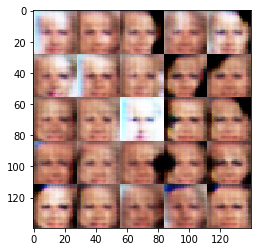

Epoch 1/1... Discriminator Loss: 1.0792... Generator Loss: 0.6028
Epoch 1/1... Discriminator Loss: 1.3958... Generator Loss: 0.4986
Epoch 1/1... Discriminator Loss: 1.5068... Generator Loss: 0.5992
Epoch 1/1... Discriminator Loss: 1.3748... Generator Loss: 1.3433
Epoch 1/1... Discriminator Loss: 1.3828... Generator Loss: 0.6304
Epoch 1/1... Discriminator Loss: 1.6533... Generator Loss: 0.3962
Epoch 1/1... Discriminator Loss: 2.0601... Generator Loss: 0.2242
Epoch 1/1... Discriminator Loss: 3.9073... Generator Loss: 4.1342
Epoch 1/1... Discriminator Loss: 1.0446... Generator Loss: 0.8707
Epoch 1/1... Discriminator Loss: 1.5342... Generator Loss: 1.0085


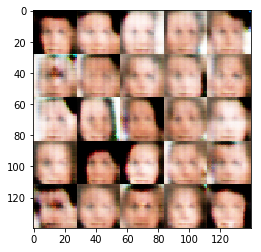

Epoch 1/1... Discriminator Loss: 1.7741... Generator Loss: 0.3168
Epoch 1/1... Discriminator Loss: 0.9496... Generator Loss: 0.9690
Epoch 1/1... Discriminator Loss: 1.5134... Generator Loss: 1.9975
Epoch 1/1... Discriminator Loss: 1.2332... Generator Loss: 1.8276
Epoch 1/1... Discriminator Loss: 1.7902... Generator Loss: 0.2593
Epoch 1/1... Discriminator Loss: 1.6565... Generator Loss: 0.3487
Epoch 1/1... Discriminator Loss: 1.0972... Generator Loss: 1.2417
Epoch 1/1... Discriminator Loss: 0.9277... Generator Loss: 1.2676
Epoch 1/1... Discriminator Loss: 1.8974... Generator Loss: 1.0940
Epoch 1/1... Discriminator Loss: 1.1145... Generator Loss: 0.8344


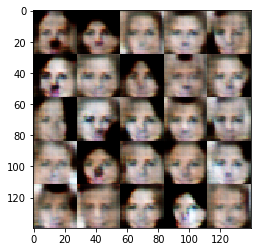

Epoch 1/1... Discriminator Loss: 0.8715... Generator Loss: 1.0818
Epoch 1/1... Discriminator Loss: 1.1774... Generator Loss: 1.2004
Epoch 1/1... Discriminator Loss: 1.0786... Generator Loss: 1.2591
Epoch 1/1... Discriminator Loss: 1.3989... Generator Loss: 0.6239
Epoch 1/1... Discriminator Loss: 0.8591... Generator Loss: 0.9353
Epoch 1/1... Discriminator Loss: 1.0194... Generator Loss: 1.1253
Epoch 1/1... Discriminator Loss: 1.6392... Generator Loss: 0.4378
Epoch 1/1... Discriminator Loss: 1.0038... Generator Loss: 1.2227
Epoch 1/1... Discriminator Loss: 1.5040... Generator Loss: 0.5635
Epoch 1/1... Discriminator Loss: 1.1428... Generator Loss: 1.4355


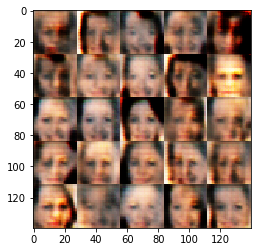

Epoch 1/1... Discriminator Loss: 1.3565... Generator Loss: 1.1330
Epoch 1/1... Discriminator Loss: 1.2004... Generator Loss: 0.8455
Epoch 1/1... Discriminator Loss: 1.1322... Generator Loss: 1.5309
Epoch 1/1... Discriminator Loss: 1.5013... Generator Loss: 1.5422
Epoch 1/1... Discriminator Loss: 1.1995... Generator Loss: 0.5733
Epoch 1/1... Discriminator Loss: 2.0832... Generator Loss: 0.2236
Epoch 1/1... Discriminator Loss: 1.5500... Generator Loss: 0.3370
Epoch 1/1... Discriminator Loss: 1.3873... Generator Loss: 0.8977
Epoch 1/1... Discriminator Loss: 0.8670... Generator Loss: 1.1475
Epoch 1/1... Discriminator Loss: 1.2041... Generator Loss: 0.7943


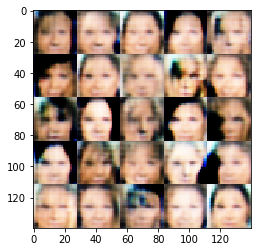

Epoch 1/1... Discriminator Loss: 1.4284... Generator Loss: 0.5535
Epoch 1/1... Discriminator Loss: 2.5747... Generator Loss: 0.1174
Epoch 1/1... Discriminator Loss: 1.3874... Generator Loss: 1.0752
Epoch 1/1... Discriminator Loss: 1.3063... Generator Loss: 0.7648
Epoch 1/1... Discriminator Loss: 1.1501... Generator Loss: 0.6201
Epoch 1/1... Discriminator Loss: 1.4052... Generator Loss: 0.4490
Epoch 1/1... Discriminator Loss: 1.1680... Generator Loss: 0.6100
Epoch 1/1... Discriminator Loss: 1.5993... Generator Loss: 0.4140
Epoch 1/1... Discriminator Loss: 1.3365... Generator Loss: 0.5553
Epoch 1/1... Discriminator Loss: 1.6620... Generator Loss: 2.2123


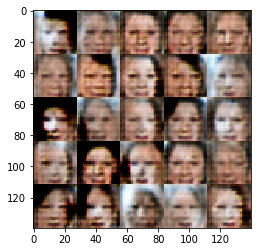

Epoch 1/1... Discriminator Loss: 0.9635... Generator Loss: 0.9484
Epoch 1/1... Discriminator Loss: 1.4748... Generator Loss: 0.6058
Epoch 1/1... Discriminator Loss: 2.7955... Generator Loss: 3.6917
Epoch 1/1... Discriminator Loss: 1.1490... Generator Loss: 0.5774
Epoch 1/1... Discriminator Loss: 1.2612... Generator Loss: 0.6098
Epoch 1/1... Discriminator Loss: 1.9012... Generator Loss: 0.2857
Epoch 1/1... Discriminator Loss: 2.1104... Generator Loss: 0.1839
Epoch 1/1... Discriminator Loss: 1.3107... Generator Loss: 0.6644
Epoch 1/1... Discriminator Loss: 1.9732... Generator Loss: 0.2712
Epoch 1/1... Discriminator Loss: 1.0541... Generator Loss: 0.9450


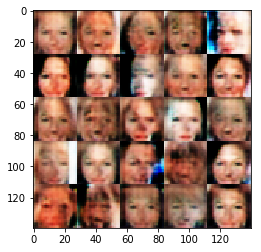

Epoch 1/1... Discriminator Loss: 1.1616... Generator Loss: 0.6331
Epoch 1/1... Discriminator Loss: 1.3004... Generator Loss: 1.9325
Epoch 1/1... Discriminator Loss: 0.9431... Generator Loss: 1.1468
Epoch 1/1... Discriminator Loss: 2.4099... Generator Loss: 2.6898
Epoch 1/1... Discriminator Loss: 1.2681... Generator Loss: 0.6691
Epoch 1/1... Discriminator Loss: 1.5257... Generator Loss: 1.6480
Epoch 1/1... Discriminator Loss: 1.2825... Generator Loss: 0.5194
Epoch 1/1... Discriminator Loss: 0.8738... Generator Loss: 1.8013
Epoch 1/1... Discriminator Loss: 1.4027... Generator Loss: 0.8757
Epoch 1/1... Discriminator Loss: 1.7268... Generator Loss: 0.9714


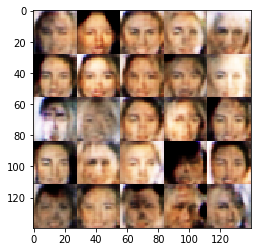

Epoch 1/1... Discriminator Loss: 1.1863... Generator Loss: 1.2376
Epoch 1/1... Discriminator Loss: 0.9065... Generator Loss: 1.2342
Epoch 1/1... Discriminator Loss: 1.2428... Generator Loss: 0.9550
Epoch 1/1... Discriminator Loss: 1.1976... Generator Loss: 1.2187
Epoch 1/1... Discriminator Loss: 1.1385... Generator Loss: 0.8146
Epoch 1/1... Discriminator Loss: 1.1905... Generator Loss: 0.7652
Epoch 1/1... Discriminator Loss: 0.8446... Generator Loss: 1.8877
Epoch 1/1... Discriminator Loss: 1.1763... Generator Loss: 0.7910
Epoch 1/1... Discriminator Loss: 1.0291... Generator Loss: 1.5657
Epoch 1/1... Discriminator Loss: 2.6153... Generator Loss: 3.1465


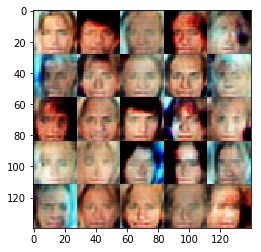

Epoch 1/1... Discriminator Loss: 0.8287... Generator Loss: 1.2332
Epoch 1/1... Discriminator Loss: 1.4810... Generator Loss: 2.1794
Epoch 1/1... Discriminator Loss: 1.8639... Generator Loss: 0.3519
Epoch 1/1... Discriminator Loss: 1.2975... Generator Loss: 0.8970
Epoch 1/1... Discriminator Loss: 1.1632... Generator Loss: 1.1603
Epoch 1/1... Discriminator Loss: 1.5982... Generator Loss: 1.8843
Epoch 1/1... Discriminator Loss: 1.3149... Generator Loss: 0.4705
Epoch 1/1... Discriminator Loss: 1.1554... Generator Loss: 0.8290
Epoch 1/1... Discriminator Loss: 1.4085... Generator Loss: 1.3275
Epoch 1/1... Discriminator Loss: 1.0074... Generator Loss: 1.3416


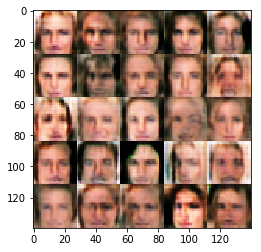

Epoch 1/1... Discriminator Loss: 1.2427... Generator Loss: 0.7459
Epoch 1/1... Discriminator Loss: 1.7326... Generator Loss: 0.3560
Epoch 1/1... Discriminator Loss: 1.1311... Generator Loss: 1.5394
Epoch 1/1... Discriminator Loss: 1.3326... Generator Loss: 0.4953
Epoch 1/1... Discriminator Loss: 0.9985... Generator Loss: 1.3425
Epoch 1/1... Discriminator Loss: 2.0755... Generator Loss: 0.1972
Epoch 1/1... Discriminator Loss: 1.2064... Generator Loss: 1.4261
Epoch 1/1... Discriminator Loss: 0.9570... Generator Loss: 0.8506
Epoch 1/1... Discriminator Loss: 1.1616... Generator Loss: 0.8901
Epoch 1/1... Discriminator Loss: 1.1656... Generator Loss: 1.4746


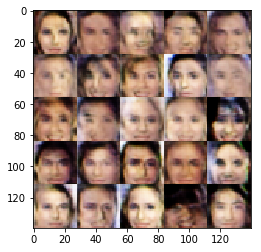

Epoch 1/1... Discriminator Loss: 1.0841... Generator Loss: 0.6848
Epoch 1/1... Discriminator Loss: 1.0139... Generator Loss: 0.7988
Epoch 1/1... Discriminator Loss: 1.1102... Generator Loss: 1.1799
Epoch 1/1... Discriminator Loss: 1.1625... Generator Loss: 0.7599
Epoch 1/1... Discriminator Loss: 1.2721... Generator Loss: 0.9366
Epoch 1/1... Discriminator Loss: 0.9535... Generator Loss: 0.9414
Epoch 1/1... Discriminator Loss: 1.7486... Generator Loss: 2.4392
Epoch 1/1... Discriminator Loss: 1.0437... Generator Loss: 1.0695
Epoch 1/1... Discriminator Loss: 1.5230... Generator Loss: 1.0192
Epoch 1/1... Discriminator Loss: 0.8307... Generator Loss: 1.0821


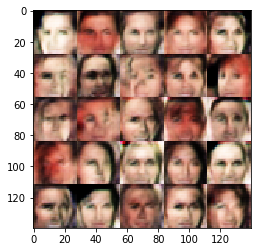

Epoch 1/1... Discriminator Loss: 1.0568... Generator Loss: 0.9137
Epoch 1/1... Discriminator Loss: 1.3420... Generator Loss: 1.3299
Epoch 1/1... Discriminator Loss: 0.9913... Generator Loss: 1.1829
Epoch 1/1... Discriminator Loss: 0.9808... Generator Loss: 0.7658
Epoch 1/1... Discriminator Loss: 1.0674... Generator Loss: 0.9511
Epoch 1/1... Discriminator Loss: 1.8236... Generator Loss: 0.2487
Epoch 1/1... Discriminator Loss: 1.3387... Generator Loss: 0.4732
Epoch 1/1... Discriminator Loss: 1.5269... Generator Loss: 0.5087
Epoch 1/1... Discriminator Loss: 1.0860... Generator Loss: 0.9438
Epoch 1/1... Discriminator Loss: 1.1335... Generator Loss: 0.8101


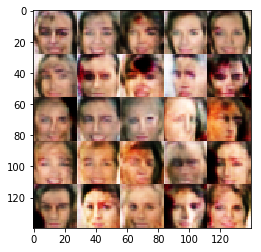

Epoch 1/1... Discriminator Loss: 1.0284... Generator Loss: 0.8354
Epoch 1/1... Discriminator Loss: 1.1535... Generator Loss: 2.4556
Epoch 1/1... Discriminator Loss: 1.0581... Generator Loss: 1.3554
Epoch 1/1... Discriminator Loss: 2.8780... Generator Loss: 3.2462
Epoch 1/1... Discriminator Loss: 1.1674... Generator Loss: 0.9508
Epoch 1/1... Discriminator Loss: 1.0394... Generator Loss: 0.8409
Epoch 1/1... Discriminator Loss: 1.6460... Generator Loss: 0.3322
Epoch 1/1... Discriminator Loss: 1.3369... Generator Loss: 0.5514
Epoch 1/1... Discriminator Loss: 0.9459... Generator Loss: 1.2092
Epoch 1/1... Discriminator Loss: 1.3270... Generator Loss: 0.5700


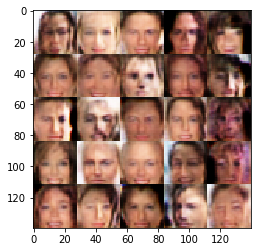

Epoch 1/1... Discriminator Loss: 1.2452... Generator Loss: 0.4798
Epoch 1/1... Discriminator Loss: 1.0682... Generator Loss: 0.9770
Epoch 1/1... Discriminator Loss: 1.3537... Generator Loss: 0.4523
Epoch 1/1... Discriminator Loss: 1.1285... Generator Loss: 1.4019
Epoch 1/1... Discriminator Loss: 1.1550... Generator Loss: 0.8118
Epoch 1/1... Discriminator Loss: 1.1898... Generator Loss: 1.6608
Epoch 1/1... Discriminator Loss: 1.2652... Generator Loss: 0.6885
Epoch 1/1... Discriminator Loss: 1.2548... Generator Loss: 0.6107
Epoch 1/1... Discriminator Loss: 1.2884... Generator Loss: 0.4967
Epoch 1/1... Discriminator Loss: 1.0502... Generator Loss: 0.8797


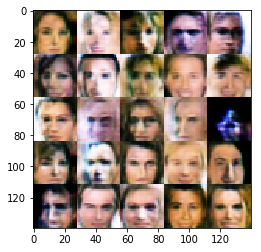

Epoch 1/1... Discriminator Loss: 1.4724... Generator Loss: 0.4424
Epoch 1/1... Discriminator Loss: 1.4562... Generator Loss: 0.4701
Epoch 1/1... Discriminator Loss: 1.3671... Generator Loss: 0.5944
Epoch 1/1... Discriminator Loss: 1.6126... Generator Loss: 0.3374
Epoch 1/1... Discriminator Loss: 1.5306... Generator Loss: 1.7367
Epoch 1/1... Discriminator Loss: 1.1220... Generator Loss: 0.8236
Epoch 1/1... Discriminator Loss: 1.3514... Generator Loss: 0.7080
Epoch 1/1... Discriminator Loss: 1.0686... Generator Loss: 0.8989
Epoch 1/1... Discriminator Loss: 1.0310... Generator Loss: 0.9305
Epoch 1/1... Discriminator Loss: 1.4375... Generator Loss: 0.4563


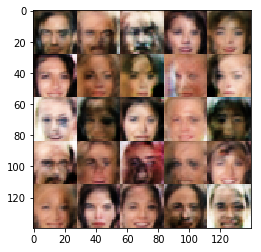

Epoch 1/1... Discriminator Loss: 1.3978... Generator Loss: 1.2447
Epoch 1/1... Discriminator Loss: 1.4436... Generator Loss: 2.1381
Epoch 1/1... Discriminator Loss: 1.2503... Generator Loss: 1.2132
Epoch 1/1... Discriminator Loss: 1.1251... Generator Loss: 0.7284
Epoch 1/1... Discriminator Loss: 1.1672... Generator Loss: 0.7905
Epoch 1/1... Discriminator Loss: 1.3585... Generator Loss: 0.5617
Epoch 1/1... Discriminator Loss: 1.1594... Generator Loss: 0.9125
Epoch 1/1... Discriminator Loss: 1.4112... Generator Loss: 0.5355
Epoch 1/1... Discriminator Loss: 1.2813... Generator Loss: 0.5964
Epoch 1/1... Discriminator Loss: 1.0173... Generator Loss: 0.7082


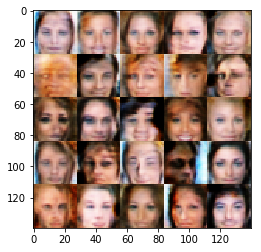

Epoch 1/1... Discriminator Loss: 1.6057... Generator Loss: 0.4037
Epoch 1/1... Discriminator Loss: 1.1205... Generator Loss: 0.7375
Epoch 1/1... Discriminator Loss: 1.0006... Generator Loss: 1.4882
Epoch 1/1... Discriminator Loss: 1.2419... Generator Loss: 0.4768
Epoch 1/1... Discriminator Loss: 1.0774... Generator Loss: 0.7303
Epoch 1/1... Discriminator Loss: 1.3547... Generator Loss: 2.2813
Epoch 1/1... Discriminator Loss: 1.4745... Generator Loss: 1.4622
Epoch 1/1... Discriminator Loss: 1.2988... Generator Loss: 0.8267
Epoch 1/1... Discriminator Loss: 1.7131... Generator Loss: 0.3760
Epoch 1/1... Discriminator Loss: 1.2161... Generator Loss: 0.6314


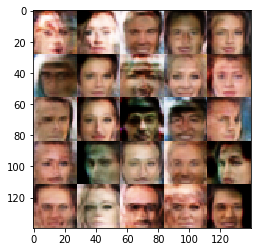

Epoch 1/1... Discriminator Loss: 1.2645... Generator Loss: 1.7084
Epoch 1/1... Discriminator Loss: 1.0114... Generator Loss: 1.0356
Epoch 1/1... Discriminator Loss: 1.0831... Generator Loss: 1.3576
Epoch 1/1... Discriminator Loss: 1.0121... Generator Loss: 1.1686
Epoch 1/1... Discriminator Loss: 1.2158... Generator Loss: 0.7466
Epoch 1/1... Discriminator Loss: 1.0658... Generator Loss: 0.7540
Epoch 1/1... Discriminator Loss: 1.6442... Generator Loss: 0.3673
Epoch 1/1... Discriminator Loss: 1.1729... Generator Loss: 0.7292
Epoch 1/1... Discriminator Loss: 1.4389... Generator Loss: 0.7748
Epoch 1/1... Discriminator Loss: 1.1700... Generator Loss: 0.7017


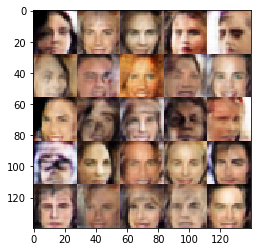

Epoch 1/1... Discriminator Loss: 1.0060... Generator Loss: 0.8618
Epoch 1/1... Discriminator Loss: 1.4061... Generator Loss: 0.4139
Epoch 1/1... Discriminator Loss: 1.4074... Generator Loss: 0.6287
Epoch 1/1... Discriminator Loss: 1.1390... Generator Loss: 0.9099
Epoch 1/1... Discriminator Loss: 1.1018... Generator Loss: 0.6031
Epoch 1/1... Discriminator Loss: 1.1387... Generator Loss: 0.8445
Epoch 1/1... Discriminator Loss: 1.3179... Generator Loss: 1.9002
Epoch 1/1... Discriminator Loss: 1.4014... Generator Loss: 0.4531
Epoch 1/1... Discriminator Loss: 1.3791... Generator Loss: 0.5710
Epoch 1/1... Discriminator Loss: 1.1653... Generator Loss: 1.3577


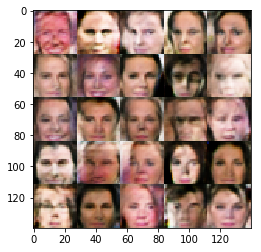

Epoch 1/1... Discriminator Loss: 0.9123... Generator Loss: 1.1625
Epoch 1/1... Discriminator Loss: 1.2438... Generator Loss: 0.7467
Epoch 1/1... Discriminator Loss: 1.7173... Generator Loss: 0.2576
Epoch 1/1... Discriminator Loss: 1.2231... Generator Loss: 1.1042
Epoch 1/1... Discriminator Loss: 1.1025... Generator Loss: 0.7094
Epoch 1/1... Discriminator Loss: 1.7002... Generator Loss: 2.0956
Epoch 1/1... Discriminator Loss: 1.0552... Generator Loss: 0.9675
Epoch 1/1... Discriminator Loss: 1.3019... Generator Loss: 0.7081
Epoch 1/1... Discriminator Loss: 1.0992... Generator Loss: 1.3647
Epoch 1/1... Discriminator Loss: 1.2390... Generator Loss: 0.6090


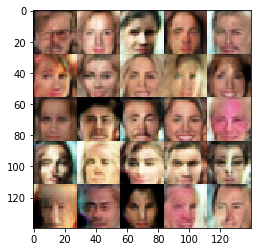

Epoch 1/1... Discriminator Loss: 1.1375... Generator Loss: 1.4964
Epoch 1/1... Discriminator Loss: 1.1325... Generator Loss: 0.5704
Epoch 1/1... Discriminator Loss: 1.3557... Generator Loss: 0.4550
Epoch 1/1... Discriminator Loss: 0.9733... Generator Loss: 0.8738
Epoch 1/1... Discriminator Loss: 0.9550... Generator Loss: 1.2147
Epoch 1/1... Discriminator Loss: 1.0616... Generator Loss: 1.0730
Epoch 1/1... Discriminator Loss: 1.1673... Generator Loss: 0.7801
Epoch 1/1... Discriminator Loss: 1.1549... Generator Loss: 1.0407
Epoch 1/1... Discriminator Loss: 1.5625... Generator Loss: 0.4299
Epoch 1/1... Discriminator Loss: 1.0187... Generator Loss: 0.8546


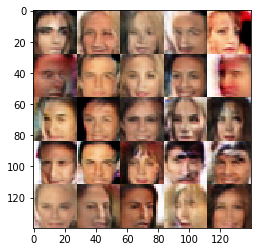

Epoch 1/1... Discriminator Loss: 1.1330... Generator Loss: 0.9293
Epoch 1/1... Discriminator Loss: 1.1382... Generator Loss: 1.1969
Epoch 1/1... Discriminator Loss: 1.0753... Generator Loss: 1.5954
Epoch 1/1... Discriminator Loss: 1.3525... Generator Loss: 0.4047
Epoch 1/1... Discriminator Loss: 1.2756... Generator Loss: 0.4728
Epoch 1/1... Discriminator Loss: 1.3383... Generator Loss: 0.5481
Epoch 1/1... Discriminator Loss: 0.9449... Generator Loss: 1.5783
Epoch 1/1... Discriminator Loss: 1.2088... Generator Loss: 0.6803
Epoch 1/1... Discriminator Loss: 1.6270... Generator Loss: 0.3346
Epoch 1/1... Discriminator Loss: 0.8989... Generator Loss: 1.1437


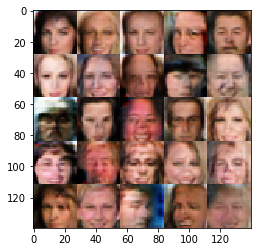

Epoch 1/1... Discriminator Loss: 1.1562... Generator Loss: 1.0631
Epoch 1/1... Discriminator Loss: 1.0374... Generator Loss: 1.2047
Epoch 1/1... Discriminator Loss: 1.1518... Generator Loss: 1.1438
Epoch 1/1... Discriminator Loss: 2.0005... Generator Loss: 2.2918
Epoch 1/1... Discriminator Loss: 1.3754... Generator Loss: 0.6347
Epoch 1/1... Discriminator Loss: 1.4395... Generator Loss: 0.4618
Epoch 1/1... Discriminator Loss: 1.2230... Generator Loss: 1.0641
Epoch 1/1... Discriminator Loss: 0.9815... Generator Loss: 1.2621
Epoch 1/1... Discriminator Loss: 1.5582... Generator Loss: 0.3123
Epoch 1/1... Discriminator Loss: 1.1201... Generator Loss: 0.8983


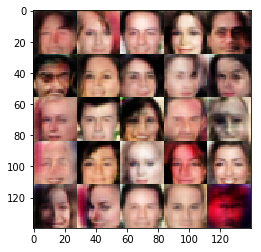

Epoch 1/1... Discriminator Loss: 0.9822... Generator Loss: 1.3149
Epoch 1/1... Discriminator Loss: 0.9876... Generator Loss: 0.9474
Epoch 1/1... Discriminator Loss: 0.9411... Generator Loss: 0.8158
Epoch 1/1... Discriminator Loss: 1.0968... Generator Loss: 0.8310
Epoch 1/1... Discriminator Loss: 1.1883... Generator Loss: 0.6457
Epoch 1/1... Discriminator Loss: 1.4052... Generator Loss: 0.4965
Epoch 1/1... Discriminator Loss: 1.5270... Generator Loss: 2.4465
Epoch 1/1... Discriminator Loss: 0.9946... Generator Loss: 1.0217
Epoch 1/1... Discriminator Loss: 1.1048... Generator Loss: 0.5824
Epoch 1/1... Discriminator Loss: 1.0106... Generator Loss: 0.9706


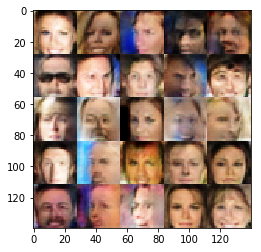

Epoch 1/1... Discriminator Loss: 1.1764... Generator Loss: 1.2985
Epoch 1/1... Discriminator Loss: 1.1772... Generator Loss: 1.4487
Epoch 1/1... Discriminator Loss: 1.0595... Generator Loss: 0.7332
Epoch 1/1... Discriminator Loss: 1.5434... Generator Loss: 0.3302
Epoch 1/1... Discriminator Loss: 1.4892... Generator Loss: 2.1037
Epoch 1/1... Discriminator Loss: 1.1965... Generator Loss: 0.7776
Epoch 1/1... Discriminator Loss: 1.5248... Generator Loss: 0.3708
Epoch 1/1... Discriminator Loss: 1.0955... Generator Loss: 1.3760
Epoch 1/1... Discriminator Loss: 1.2180... Generator Loss: 1.0275
Epoch 1/1... Discriminator Loss: 1.2060... Generator Loss: 0.5620


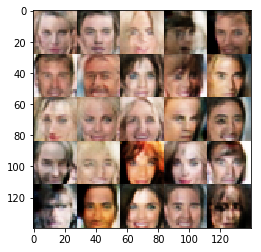

Epoch 1/1... Discriminator Loss: 1.2983... Generator Loss: 0.8184
Epoch 1/1... Discriminator Loss: 0.9901... Generator Loss: 0.7233
Epoch 1/1... Discriminator Loss: 1.0932... Generator Loss: 0.9145
Epoch 1/1... Discriminator Loss: 1.1285... Generator Loss: 0.6800
Epoch 1/1... Discriminator Loss: 2.0361... Generator Loss: 2.9406
Epoch 1/1... Discriminator Loss: 1.3152... Generator Loss: 0.6208
Epoch 1/1... Discriminator Loss: 1.9096... Generator Loss: 0.2464
Epoch 1/1... Discriminator Loss: 1.2808... Generator Loss: 1.6287
Epoch 1/1... Discriminator Loss: 1.2185... Generator Loss: 0.7875
Epoch 1/1... Discriminator Loss: 1.1757... Generator Loss: 0.6161


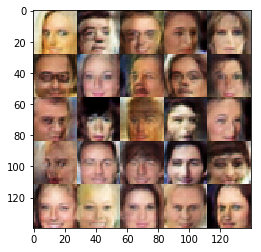

Epoch 1/1... Discriminator Loss: 1.1209... Generator Loss: 0.8225
Epoch 1/1... Discriminator Loss: 1.0565... Generator Loss: 0.7641
Epoch 1/1... Discriminator Loss: 1.0070... Generator Loss: 1.0070
Epoch 1/1... Discriminator Loss: 1.0102... Generator Loss: 0.8374
Epoch 1/1... Discriminator Loss: 1.2241... Generator Loss: 0.5187
Epoch 1/1... Discriminator Loss: 1.3405... Generator Loss: 0.4529
Epoch 1/1... Discriminator Loss: 1.0442... Generator Loss: 0.9749
Epoch 1/1... Discriminator Loss: 1.1314... Generator Loss: 1.0143
Epoch 1/1... Discriminator Loss: 1.0463... Generator Loss: 0.8336
Epoch 1/1... Discriminator Loss: 1.6274... Generator Loss: 0.3651


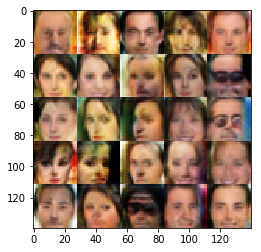

Epoch 1/1... Discriminator Loss: 1.2093... Generator Loss: 0.5893
Epoch 1/1... Discriminator Loss: 0.9218... Generator Loss: 1.0039
Epoch 1/1... Discriminator Loss: 0.9324... Generator Loss: 0.9635
Epoch 1/1... Discriminator Loss: 1.1064... Generator Loss: 0.7708
Epoch 1/1... Discriminator Loss: 1.3738... Generator Loss: 2.1202
Epoch 1/1... Discriminator Loss: 1.2310... Generator Loss: 0.5324
Epoch 1/1... Discriminator Loss: 1.2023... Generator Loss: 0.8132
Epoch 1/1... Discriminator Loss: 1.2284... Generator Loss: 0.5404
Epoch 1/1... Discriminator Loss: 1.0255... Generator Loss: 1.1537
Epoch 1/1... Discriminator Loss: 1.2943... Generator Loss: 0.4846


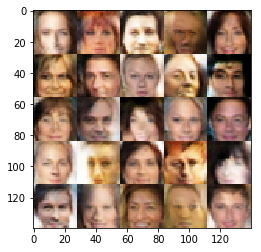

Epoch 1/1... Discriminator Loss: 1.0075... Generator Loss: 0.9616
Epoch 1/1... Discriminator Loss: 1.4267... Generator Loss: 1.2365
Epoch 1/1... Discriminator Loss: 1.4791... Generator Loss: 0.4478
Epoch 1/1... Discriminator Loss: 1.1290... Generator Loss: 1.3588
Epoch 1/1... Discriminator Loss: 1.1620... Generator Loss: 0.8119
Epoch 1/1... Discriminator Loss: 1.3086... Generator Loss: 0.6382


In [38]:
batch_size = 64
z_dim = 100
learning_rate = .001
beta1 = .5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.